**Step one: import the correct dataset**

In [ ]:
import pandas as pd
import pandas as numpy
import matplotlib.pyplot as plt

import datetime as dt

In [ ]:
data_df = pd.read_csv("Google_Stocks.csv", parse_dates = True, index_col = "Month_Starting")
data_df
# we wanna make sure we index at the month starting point because we will focus on the avg volume

,Avg_Volume
Month_Starting,
2022-12-01,21771536
2022-11-01,28294944
2022-10-01,27843110
2022-09-01,25381194
2022-08-01,18737451
...,...
2014-07-01,31411358
2014-06-01,36121936
2014-05-01,34808252


In [ ]:
# pd.read_excel("Google_Dataset.xlsx", parse_dates = True, index_col='Month Starting')
# data_df

In [ ]:
data_df.head()



,Avg_Volume
Month_Starting,
2022-12-01,21771536
2022-11-01,28294944
2022-10-01,27843110
2022-09-01,25381194
2022-08-01,18737451


In [ ]:
data_df.shape
# this is rows and columns

(106, 1)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2022-12-01 to 2014-03-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Avg_Volume  106 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


**Step two: Data preproccessing**

In [ ]:
data_df.isna().sum()

Avg_Volume    0
dtype: int64

In [ ]:
data_df.columns

Index(['Avg_Volume'], dtype='object')

In [ ]:
data_google = data_df
data_google.head(10)

,Avg_Volume
Month_Starting,
2022-12-01,21771536
2022-11-01,28294944
2022-10-01,27843110
2022-09-01,25381194
2022-08-01,18737451
2022-07-01,31945632
2022-06-01,29865028
2022-05-01,34165949
2022-04-01,28247285


**Step four ETS**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from statsmodels.tsa.tsatools import freq_to_period

In [ ]:
result = seasonal_decompose(data_df['Avg_Volume'], model = 'multiplicative', period=12)

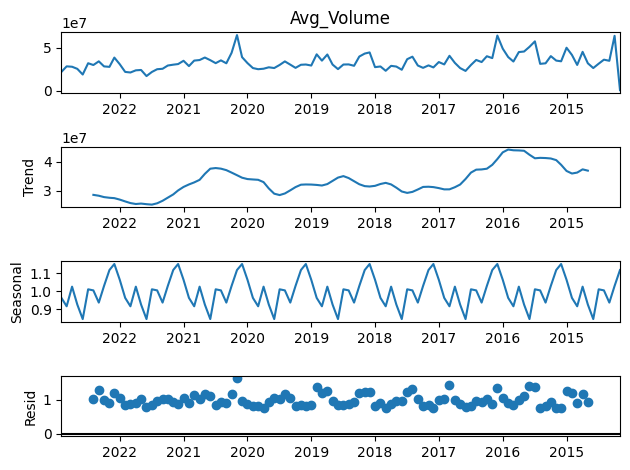

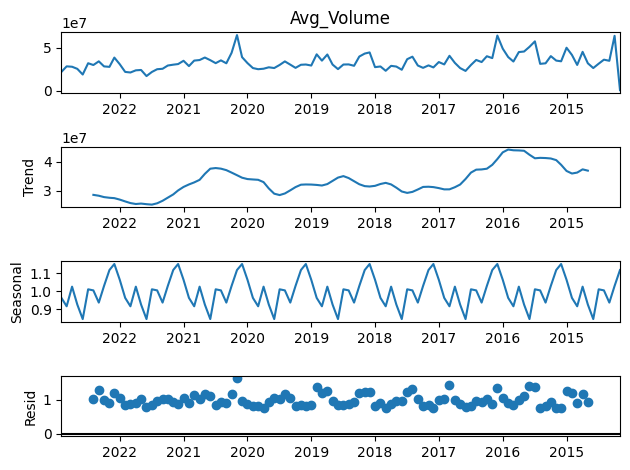

In [ ]:
result.plot()

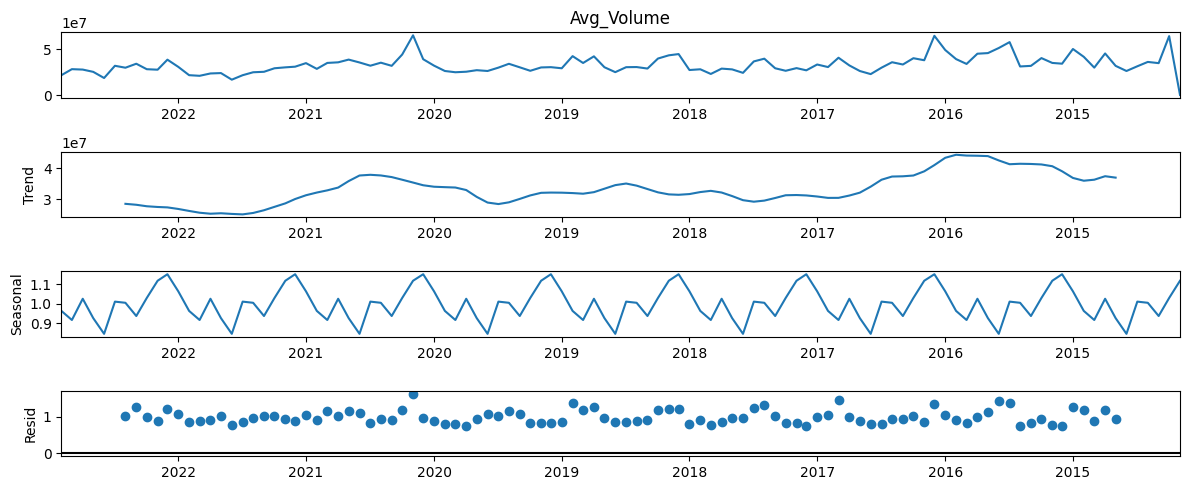

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=12,5
result.plot();

**Step Five: Create EWMA**

In [ ]:
data_df.index = pd.to_datetime(data_df.index)
print(data_df)

                Avg_Volume
Month_Starting            
2022-12-01        21771536
2022-11-01        28294944
2022-10-01        27843110
2022-09-01        25381194
2022-08-01        18737451
...                    ...
2014-07-01        31411358
2014-06-01        36121936
2014-05-01        34808252
2014-04-01        64037909
2014-03-01          432192

[106 rows x 1 columns]


In [ ]:
data_df.head()

,Avg_Volume
Month_Starting,
2022-12-01,21771536
2022-11-01,28294944
2022-10-01,27843110
2022-09-01,25381194
2022-08-01,18737451


In [ ]:
data_df.index

DatetimeIndex(['2022-12-01', '2022-11-01', '2022-10-01', '2022-09-01',
               '2022-08-01', '2022-07-01', '2022-06-01', '2022-05-01',
               '2022-04-01', '2022-03-01',
               ...
               '2014-12-01', '2014-11-01', '2014-10-01', '2014-09-01',
               '2014-08-01', '2014-07-01', '2014-06-01', '2014-05-01',
               '2014-04-01', '2014-03-01'],
              dtype='datetime64[ns]', name='Month_Starting', length=106, freq=None)

**Six months**

In [ ]:
data_df['6-month-SMA'] = data_df['Avg_Volume'].rolling (window = 6).mean() #Window is in relation to data
data_df

,Avg_Volume,6-month-SMA
Month_Starting,,
2022-12-01,21771536,NaN
2022-11-01,28294944,NaN
2022-10-01,27843110,NaN
2022-09-01,25381194,NaN
2022-08-01,18737451,NaN
...,...,...
2014-07-01,31411358,3.441128e+07
2014-06-01,36121936,3.349253e+07
2014-05-01,34808252,3.430329e+07


**12 Months**

In [ ]:
data_df['12-month-SMA'] = data_df['Avg_Volume'].rolling (window = 12).mean()
data_df

,Avg_Volume,6-month-SMA,12-month-SMA
Month_Starting,,,
2022-12-01,21771536,NaN,NaN
2022-11-01,28294944,NaN,NaN
2022-10-01,27843110,NaN,NaN
2022-09-01,25381194,NaN,NaN
2022-08-01,18737451,NaN,NaN
...,...,...,...
2014-07-01,31411358,3.441128e+07,3.576546e+07
2014-06-01,36121936,3.349253e+07,3.617391e+07
2014-05-01,34808252,3.430329e+07,3.641903e+07


<Axes: xlabel='Month_Starting'>

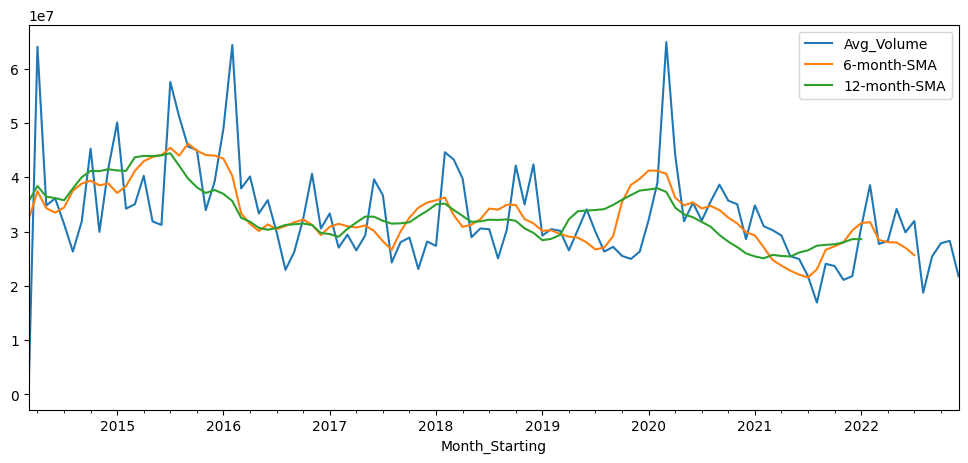

In [ ]:
data_df.plot()

**Creating EWMA**

In [ ]:
data_df['EWMA-12'] = data_df['Avg_Volume'].ewm (span = 12).mean()
data_df

,Avg_Volume,6-month-SMA,12-month-SMA,EWMA-12
Month_Starting,,,,
2022-12-01,21771536,NaN,NaN,2.177154e+07
2022-11-01,28294944,NaN,NaN,2.530505e+07
2022-10-01,27843110,NaN,NaN,2.629565e+07
2022-09-01,25381194,NaN,NaN,2.600700e+07
2022-08-01,18737451,NaN,NaN,2.403189e+07
...,...,...,...,...
2014-07-01,31411358,3.441128e+07,3.576546e+07,3.609229e+07
2014-06-01,36121936,3.349253e+07,3.617391e+07,3.609685e+07
2014-05-01,34808252,3.430329e+07,3.641903e+07,3.589861e+07


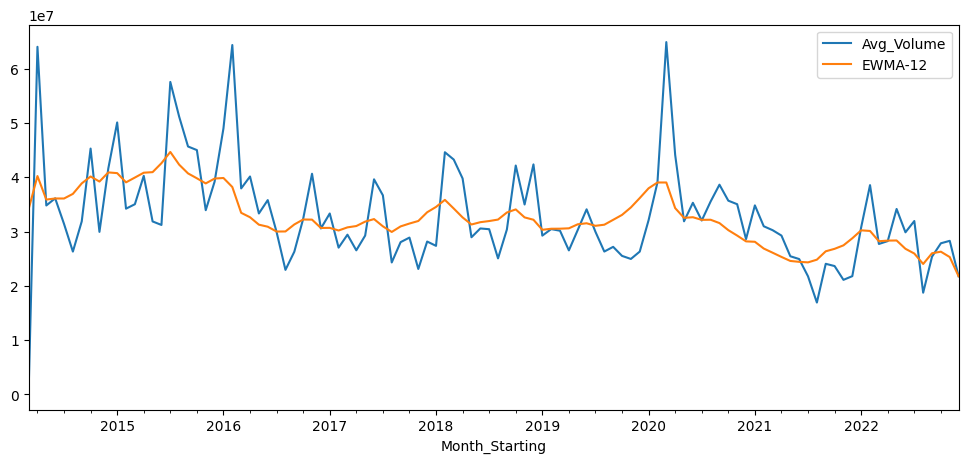

In [ ]:
data_df[['Avg_Volume', 'EWMA-12']].plot();

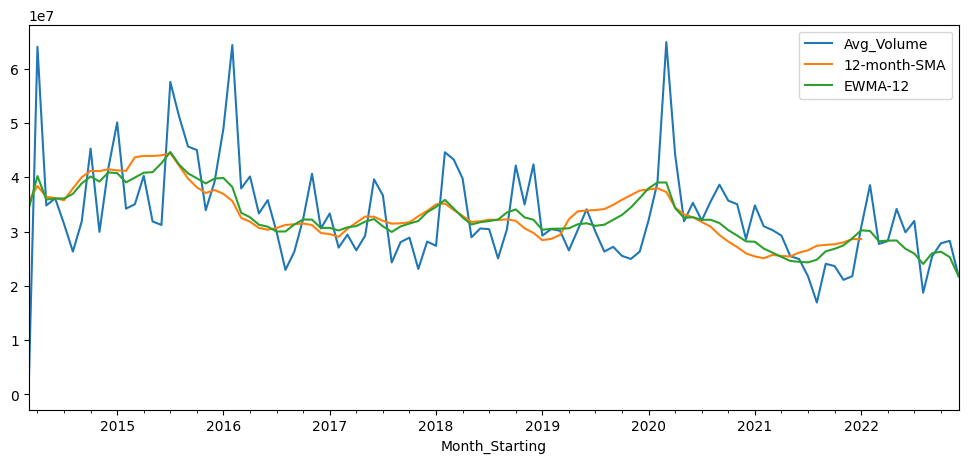

In [ ]:
data_df[['Avg_Volume','12-month-SMA','EWMA-12']].plot(figsize=(12,5));

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2022-12-01 to 2014-03-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Avg_Volume    106 non-null    int64  
 1   6-month-SMA   101 non-null    float64
 2   12-month-SMA  95 non-null     float64
 3   EWMA-12       106 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.1 KB


In [ ]:
data_df.columns

Index(['Avg_Volume', '6-month-SMA', '12-month-SMA', 'EWMA-12'], dtype='object')

In [ ]:
data_df['EWMA-6'] = data_df['Avg_Volume'].ewm (span = 6).mean()
data_df

,Avg_Volume,6-month-SMA,12-month-SMA,EWMA-12,EWMA-6
Month_Starting,,,,,
2022-12-01,21771536,NaN,NaN,2.177154e+07,2.177154e+07
2022-11-01,28294944,NaN,NaN,2.530505e+07,2.557686e+07
2022-10-01,27843110,NaN,NaN,2.629565e+07,2.659563e+07
2022-09-01,25381194,NaN,NaN,2.600700e+07,2.612654e+07
2022-08-01,18737451,NaN,NaN,2.403189e+07,2.353318e+07
...,...,...,...,...,...
2014-07-01,31411358,3.441128e+07,3.576546e+07,3.609229e+07,3.360592e+07
2014-06-01,36121936,3.349253e+07,3.617391e+07,3.609685e+07,3.432478e+07
2014-05-01,34808252,3.430329e+07,3.641903e+07,3.589861e+07,3.446292e+07


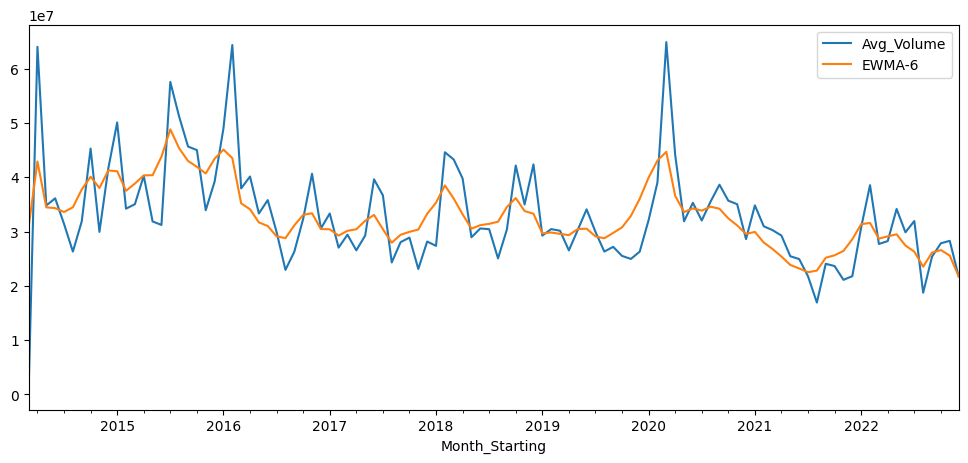

In [ ]:
data_df[['Avg_Volume', 'EWMA-6']].plot();

**Create General Forecasting for the next quarter**

In [ ]:
import warnings
warnings.filterwarnings("ignore")



In [ ]:
data_df.index.asfreq = 'MS' # ms == month start
data_df.head()
# make sure to put the as in front of the

,Avg_Volume,6-month-SMA,12-month-SMA,EWMA-12,EWMA-6
Month_Starting,,,,,
2022-12-01,21771536,NaN,NaN,2.177154e+07,2.177154e+07
2022-11-01,28294944,NaN,NaN,2.530505e+07,2.557686e+07
2022-10-01,27843110,NaN,NaN,2.629565e+07,2.659563e+07
2022-09-01,25381194,NaN,NaN,2.600700e+07,2.612654e+07
2022-08-01,18737451,NaN,NaN,2.403189e+07,2.353318e+07


In [ ]:
data_df.tail()

,Avg_Volume,6-month-SMA,12-month-SMA,EWMA-12,EWMA-6
Month_Starting,,,,,
2014-07-01,31411358,3.441128e+07,3.576546e+07,3.609229e+07,3.360592e+07
2014-06-01,36121936,3.349253e+07,3.617391e+07,3.609685e+07,3.432478e+07
2014-05-01,34808252,3.430329e+07,3.641903e+07,3.589861e+07,3.446292e+07
2014-04-01,64037909,3.742780e+07,3.839962e+07,4.022773e+07,4.291291e+07
2014-03-01,432192,3.218754e+07,3.551565e+07,3.410534e+07,3.077557e+07


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2022-12-01 to 2014-03-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Avg_Volume    106 non-null    int64  
 1   6-month-SMA   101 non-null    float64
 2   12-month-SMA  95 non-null     float64
 3   EWMA-12       106 non-null    float64
 4   EWMA-6        106 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.0 KB


In [ ]:
len(data_df)

106

**Train the data**

In [ ]:
train_data = data_df.iloc[:80] #
test_data = data_df.iloc[80:]

In [ ]:
len(train_data), len(test_data)

(80, 26)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ml_model = ExponentialSmoothing(train_data['Avg_Volume'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
test_predictions = ml_model.forecast(119).rename('Google Forecast')

In [ ]:
test_predictions

80     3.357966e+07
81     3.869674e+07
82     3.566913e+07
83     3.206085e+07
84     2.941259e+07
           ...     
194    7.690581e+06
195    7.117375e+06
196    5.983506e+06
197    6.604975e+06
198    7.418078e+06
Name: Google Forecast, Length: 119, dtype: float64

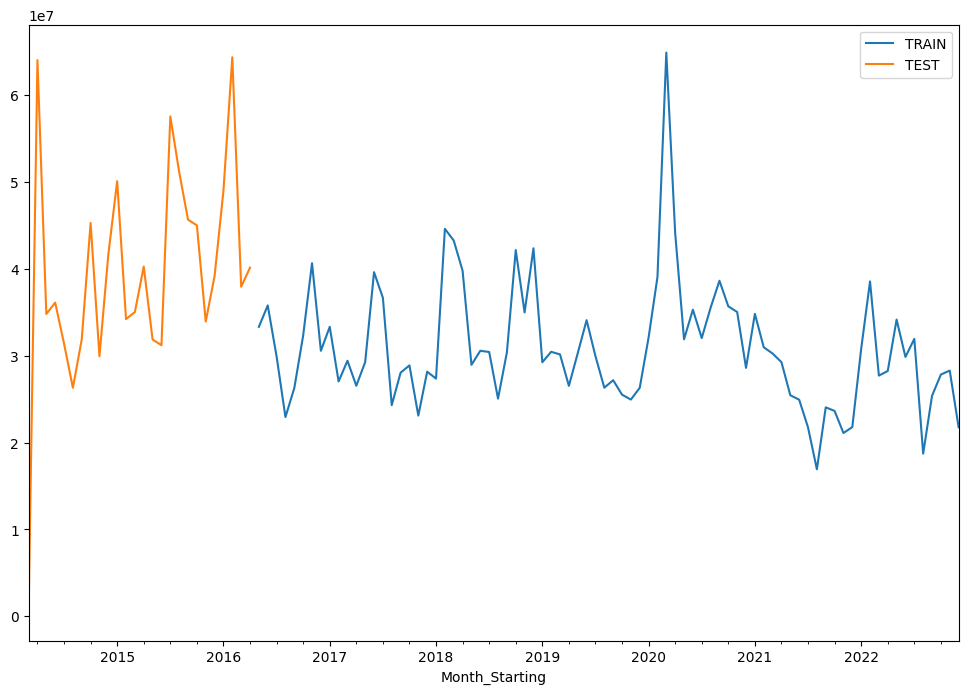

In [ ]:
train_data['Avg_Volume'].plot(legend=True,label='TRAIN')
test_data['Avg_Volume'].plot(legend=True,label='TEST',figsize=(12,8));

<Axes: xlabel='Month_Starting'>

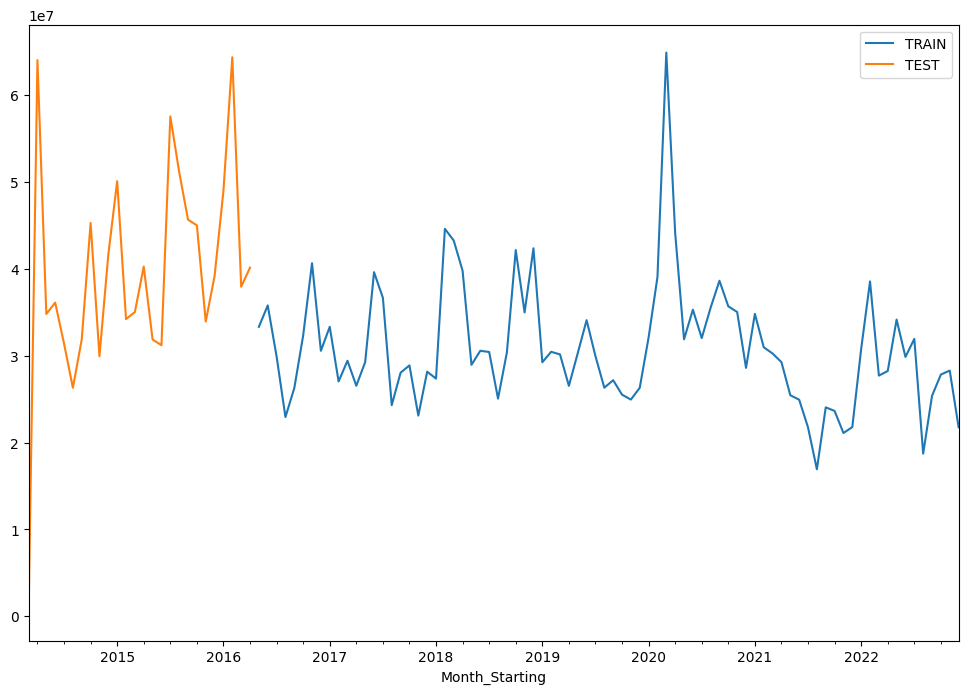

In [ ]:
train_data['Avg_Volume'].plot(legend=True,label='TRAIN')
test_data['Avg_Volume'].plot(legend=True,label='TEST',figsize=(12,8))


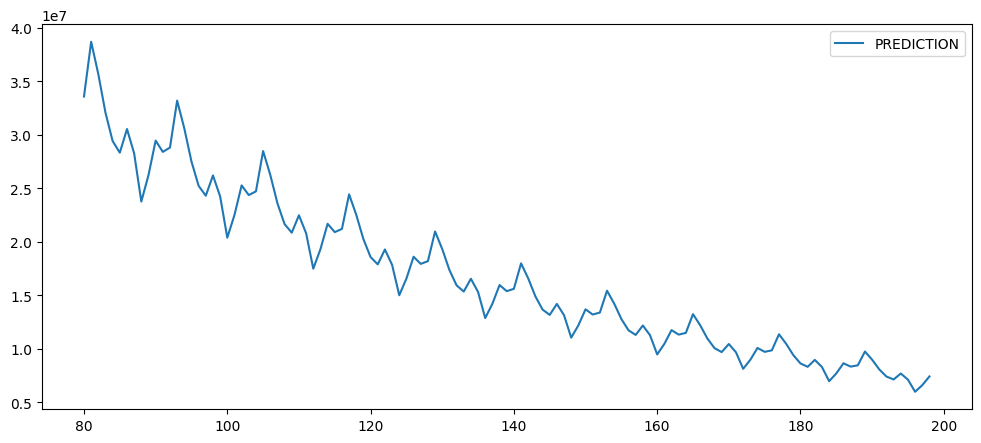

In [ ]:
test_predictions.plot(legend=True,label='PREDICTION');

<Axes: xlabel='Month_Starting'>

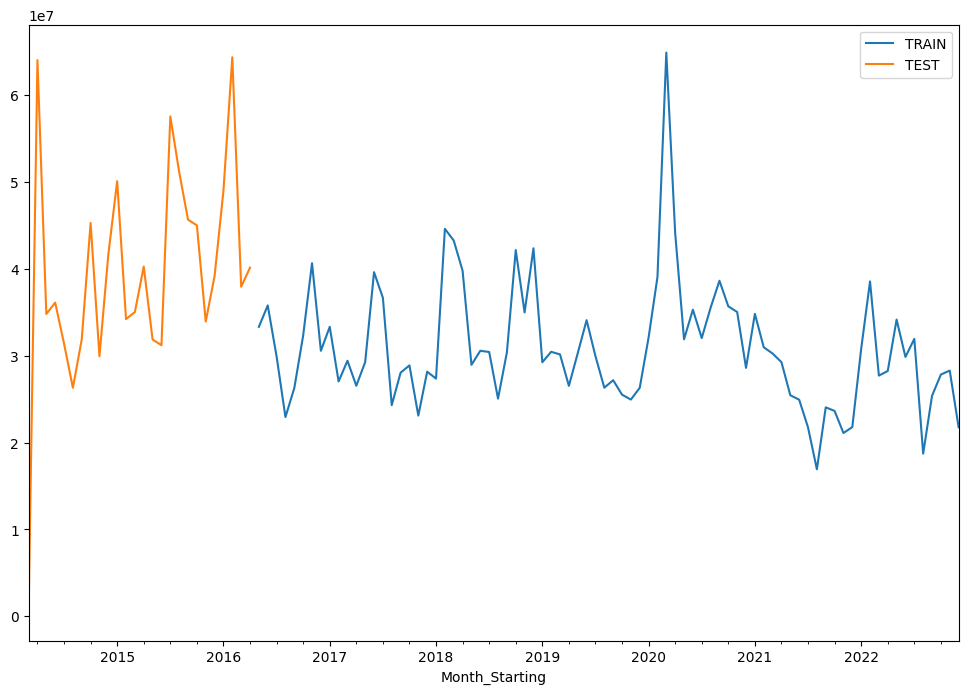

In [ ]:
train_data['Avg_Volume'].plot(legend=True,label='TRAIN')
test_data['Avg_Volume'].plot(legend=True,label='TEST',figsize=(12,8))
#let's zoom into the period we were predicting for


In [ ]:
#  create new visuals

In [ ]:
final_model = ExponentialSmoothing(data_df['Avg_Volume'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month_Starting'>

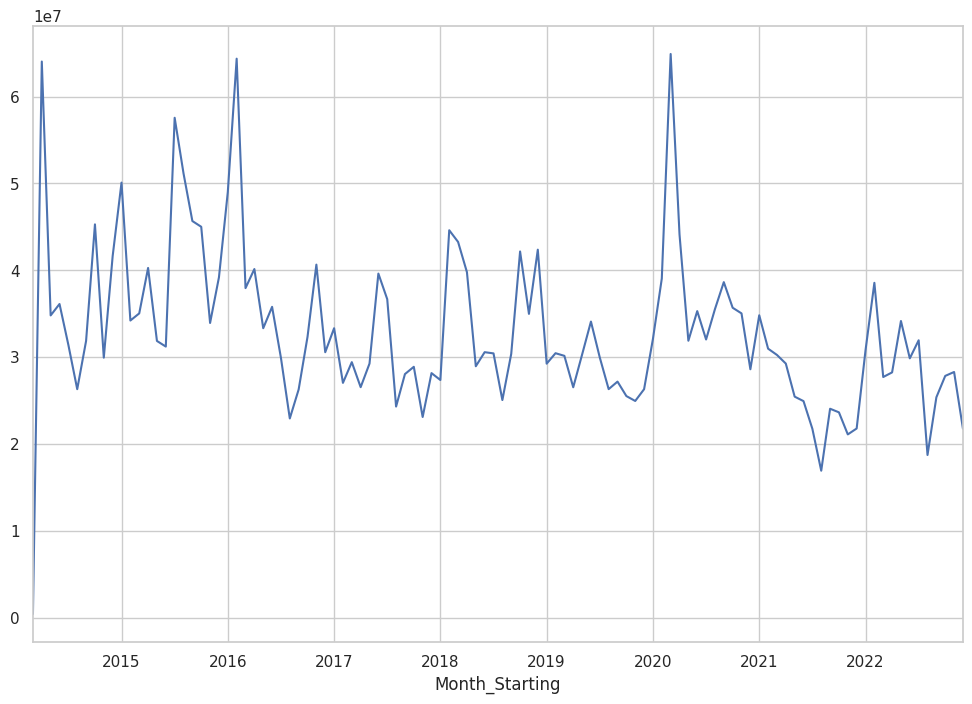

In [ ]:
data_df['Avg_Volume'].plot(figsize=(12,8))


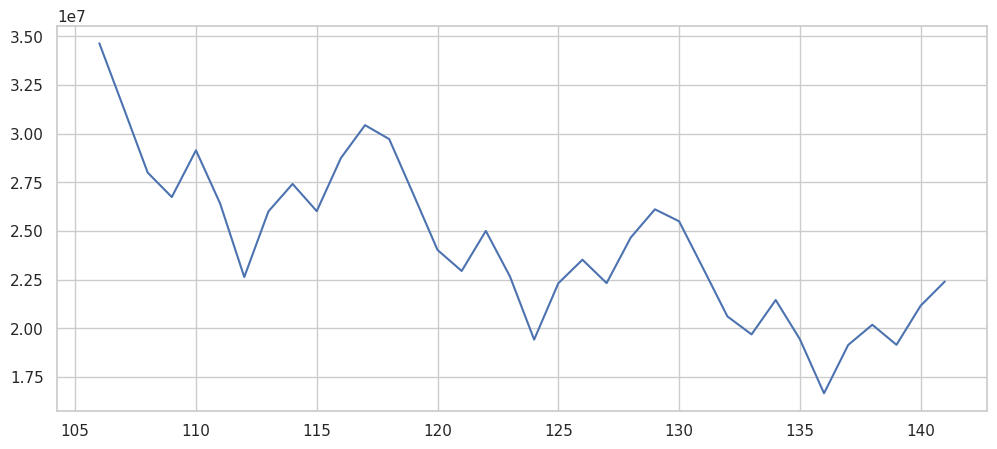

In [ ]:
forecast_predictions.plot();

Text(0.5, 1.0, 'Histogram of Average Volume')

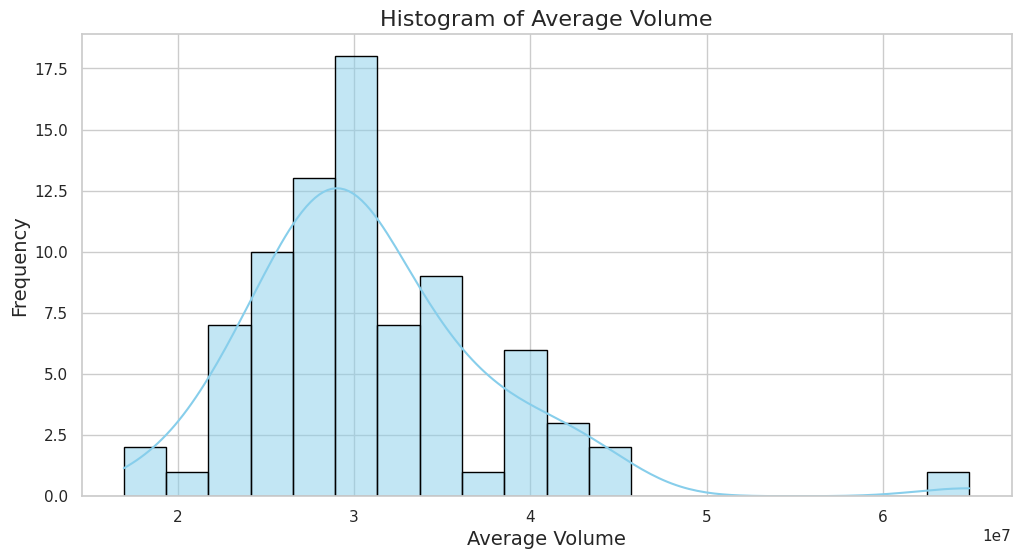

In [ ]:
#Avg Volume Histogram Seaborn
# Set Seaborn style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=train_data, x='Avg_Volume', bins=20, color="skyblue", edgecolor='black', kde=True)

# Add labels and a title
plt.xlabel("Average Volume", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Average Volume", fontsize=16)

# Test for Stationarity

<Axes: xlabel='Month_Starting'>

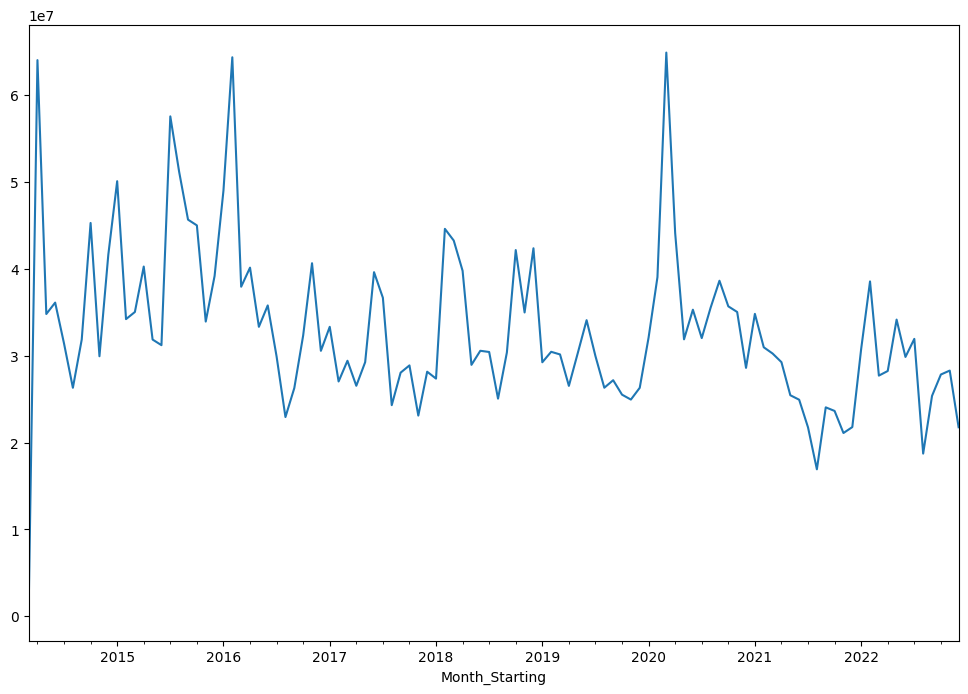

In [ ]:
data_df['Avg_Volume'].plot(figsize=(12,8))


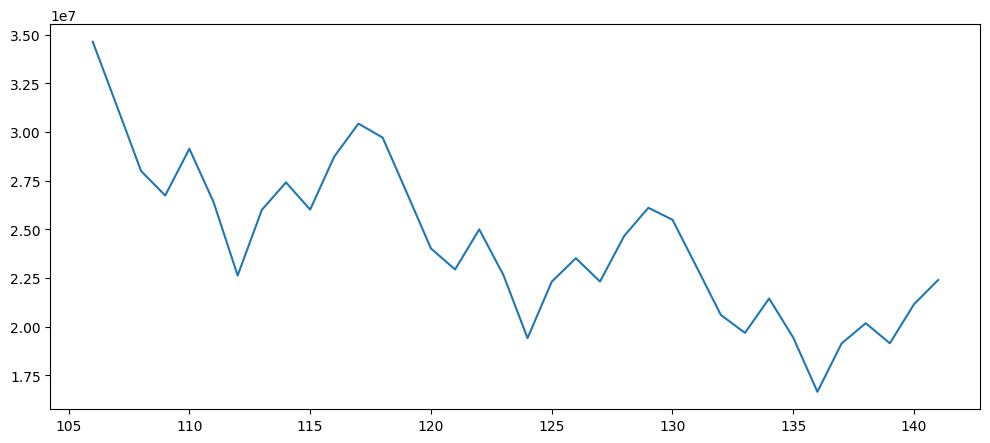

In [ ]:
forecast_predictions.plot();